<a href="https://colab.research.google.com/github/BinduParvati7/Capstone5588/blob/Hemanth/East_coast_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#Importing the Required libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import math
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
train = pd.read_csv("/content/drive/MyDrive/DS_Capstone/fraudTrain.csv", index_col=0)
pd.options.display.float_format = '{:,.2f}'.format

In [40]:
test = pd.read_csv("/content/drive/MyDrive/DS_Capstone/fraudTest.csv", index_col=0)
pd.options.display.float_format = '{:,.2f}'.format

In [41]:
merged_df = pd.concat([train, test], axis=0, ignore_index=True)

In [42]:
merged_df = merged_df.drop(['first','last','trans_num'], axis=1)

In [43]:
merged_df.shape

(1852394, 19)

In [44]:
#merged_df.to_csv('merged_data.csv', index=False)

In [45]:
merged_df.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.08,-81.18,3495,"Psychologist, counselling",1988-03-09,1325376018,36.01,-82.05,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.89,-118.21,149,Special educational needs teacher,1978-06-21,1325376044,49.16,-118.19,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.18,-112.26,4154,Nature conservation officer,1962-01-19,1325376051,43.15,-112.15,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.23,-112.11,1939,Patent attorney,1967-01-12,1325376076,47.03,-112.56,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.42,-79.46,99,Dance movement psychotherapist,1986-03-28,1325376186,38.67,-78.63,0


In [46]:
merged_df['trans_date_trans_time'] = pd.to_datetime(merged_df['trans_date_trans_time'])
merged_df['dob'] = pd.to_datetime(merged_df['dob'])

In [47]:
# Extract relevant information from datetime columns
merged_df['trans_year'] = merged_df['trans_date_trans_time'].dt.year
merged_df['trans_month'] = merged_df['trans_date_trans_time'].dt.month
merged_df['trans_day'] = merged_df['trans_date_trans_time'].dt.day
merged_df['dob_year'] = merged_df['dob'].dt.year
merged_df['dob_month'] = merged_df['dob'].dt.month
merged_df['dob_day'] = merged_df['dob'].dt.day

# Drop the original datetime columns
merged_df = merged_df.drop(['trans_date_trans_time', 'dob'], axis=1)

In [11]:
#cleandf = merged_df.copy()

#Dividing data into eastcost

In [48]:
# List of East Coast state codes
east_coast_states = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA', 'DE', 'MD', 'VA', 'NC', 'SC', 'GA', 'FL', 'WV', 'OH', 'KY', 'TN', 'MS', 'AL', 'WI', 'IL']

# Filter the data for East Coast states
east_coast_df = merged_df[merged_df['state'].isin(east_coast_states)]

In [49]:
east_coast_df.shape

(973613, 23)

In [50]:
value_counts = east_coast_df['is_fraud'].value_counts()
print(value_counts)

0    968367
1      5246
Name: is_fraud, dtype: int64


In [51]:
east_coast_data=east_coast_df.copy()

In [52]:
# Preprocessing
# Assuming you have already converted 'trans_date_trans_time' and 'dob' columns to datetime
# Encode categorical columns using LabelEncoder
label_encoders = {}
categorical_columns = ['merchant', 'category', 'gender', 'street', 'city', 'state', 'job']
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    east_coast_data[col] = label_encoders[col].fit_transform(east_coast_data[col])

# Split the data into features (X) and target (y)
X = east_coast_data.drop(['is_fraud'], axis=1)
y = east_coast_data['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
east_coast_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973613 entries, 0 to 1852388
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   cc_num       973613 non-null  int64  
 1   merchant     973613 non-null  int64  
 2   category     973613 non-null  int64  
 3   amt          973613 non-null  float64
 4   gender       973613 non-null  int64  
 5   street       973613 non-null  int64  
 6   city         973613 non-null  int64  
 7   state        973613 non-null  int64  
 8   zip          973613 non-null  int64  
 9   lat          973613 non-null  float64
 10  long         973613 non-null  float64
 11  city_pop     973613 non-null  int64  
 12  job          973613 non-null  int64  
 13  unix_time    973613 non-null  int64  
 14  merch_lat    973613 non-null  float64
 15  merch_long   973613 non-null  float64
 16  is_fraud     973613 non-null  int64  
 17  trans_year   973613 non-null  int64  
 18  trans_month  973613 non

In [63]:
corr = east_coast_data.corr()
corr.style.background_gradient(cmap ='coolwarm')

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_day,dob_year,dob_month,dob_day
cc_num,1.000000,-0.000776,-0.003136,0.002812,0.032873,-0.002910,0.056395,-0.011482,0.009693,-0.017761,0.017361,-0.030967,-0.001007,0.000945,-0.017590,0.017211,-0.000341,0.000586,0.000894,0.000057,-0.026112,0.053931,0.051770
merchant,-0.000776,1.000000,0.030047,-0.002897,-0.000151,-0.000705,0.000051,-0.000119,0.000210,-0.000564,-0.000053,0.000200,0.002054,0.000154,-0.000683,0.000054,-0.000596,0.000442,-0.000498,0.000438,0.006124,-0.000032,-0.001020
category,-0.003136,0.030047,1.000000,0.030676,-0.029271,0.001737,0.000086,0.000990,-0.002003,-0.008534,0.003103,0.006906,-0.000044,-0.000024,-0.008474,0.003162,0.020410,-0.001347,0.001921,-0.000668,0.001715,0.001878,0.000586
amt,0.002812,-0.002897,0.030676,1.000000,0.002712,0.000063,0.007211,0.007377,-0.000279,0.000778,0.002762,0.000010,-0.003044,-0.003289,0.000709,0.002791,0.215076,-0.002141,-0.002765,-0.000847,0.009672,0.000635,0.003912
gender,0.032873,-0.000151,-0.029271,0.002712,1.000000,0.032426,0.061444,-0.004757,-0.022576,0.059134,0.001782,-0.053493,-0.034464,-0.001470,0.058764,0.001772,0.002935,-0.000631,-0.001695,-0.001039,0.027606,-0.118467,-0.039279
street,-0.002910,-0.000705,0.001737,0.000063,0.032426,1.000000,-0.028330,-0.015947,0.020832,0.058287,-0.007530,-0.017818,0.016713,-0.001036,0.057902,-0.007415,-0.001910,-0.001107,-0.000132,-0.000284,0.004034,0.011817,-0.010969
city,0.056395,0.000051,0.000086,0.007211,0.061444,-0.028330,1.000000,-0.049015,0.077695,-0.038661,-0.064476,-0.019160,0.013579,-0.000100,-0.038311,-0.064240,0.000085,0.000981,-0.002023,0.001383,-0.027711,-0.189012,0.087098
state,-0.011482,-0.000119,0.000990,0.007377,-0.004757,-0.015947,-0.049015,1.000000,-0.203104,0.495026,0.211288,-0.013306,-0.025951,-0.000223,0.491024,0.210369,0.000803,0.000372,-0.001037,-0.000601,0.030241,0.138212,0.093392
zip,0.009693,0.000210,-0.002003,-0.000279,-0.022576,0.020832,0.077695,-0.203104,1.000000,-0.284924,-0.902955,-0.062477,0.003023,0.002647,-0.282693,-0.898068,-0.000799,0.002066,0.001676,0.000461,0.006694,-0.094783,-0.031646
lat,-0.017761,-0.000564,-0.008534,0.000778,0.059134,0.058287,-0.038661,0.495026,-0.284924,1.000000,0.385508,-0.057704,-0.068349,0.000995,0.991868,0.383614,-0.000094,0.001196,0.000050,-0.001190,-0.010870,0.071668,0.059754


,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_day,dob_year,dob_month,dob_day
cc_num,1.000000,-0.000776,-0.003136,0.002812,0.032873,-0.002910,0.056395,-0.011482,0.009693,-0.017761,0.017361,-0.030967,-0.001007,0.000945,-0.017590,0.017211,-0.000341,0.000586,0.000894,0.000057,-0.026112,0.053931,0.051770
merchant,-0.000776,1.000000,0.030047,-0.002897,-0.000151,-0.000705,0.000051,-0.000119,0.000210,-0.000564,-0.000053,0.000200,0.002054,0.000154,-0.000683,0.000054,-0.000596,0.000442,-0.000498,0.000438,0.006124,-0.000032,-0.001020
category,-0.003136,0.030047,1.000000,0.030676,-0.029271,0.001737,0.000086,0.000990,-0.002003,-0.008534,0.003103,0.006906,-0.000044,-0.000024,-0.008474,0.003162,0.020410,-0.001347,0.001921,-0.000668,0.001715,0.001878,0.000586
amt,0.002812,-0.002897,0.030676,1.000000,0.002712,0.000063,0.007211,0.007377,-0.000279,0.000778,0.002762,0.000010,-0.003044,-0.003289,0.000709,0.002791,0.215076,-0.002141,-0.002765,-0.000847,0.009672,0.000635,0.003912
gender,0.032873,-0.000151,-0.029271,0.002712,1.000000,0.032426,0.061444,-0.004757,-0.022576,0.059134,0.001782,-0.053493,-0.034464,-0.001470,0.058764,0.001772,0.002935,-0.000631,-0.001695,-0.001039,0.027606,-0.118467,-0.039279
street,-0.002910,-0.000705,0.001737,0.000063,0.032426,1.000000,-0.028330,-0.015947,0.020832,0.058287,-0.007530,-0.017818,0.016713,-0.001036,0.057902,-0.007415,-0.001910,-0.001107,-0.000132,-0.000284,0.004034,0.011817,-0.010969
city,0.056395,0.000051,0.000086,0.007211,0.061444,-0.028330,1.000000,-0.049015,0.077695,-0.038661,-0.064476,-0.019160,0.013579,-0.000100,-0.038311,-0.064240,0.000085,0.000981,-0.002023,0.001383,-0.027711,-0.189012,0.087098
state,-0.011482,-0.000119,0.000990,0.007377,-0.004757,-0.015947,-0.049015,1.000000,-0.203104,0.495026,0.211288,-0.013306,-0.025951,-0.000223,0.491024,0.210369,0.000803,0.000372,-0.001037,-0.000601,0.030241,0.138212,0.093392
zip,0.009693,0.000210,-0.002003,-0.000279,-0.022576,0.020832,0.077695,-0.203104,1.000000,-0.284924,-0.902955,-0.062477,0.003023,0.002647,-0.282693,-0.898068,-0.000799,0.002066,0.001676,0.000461,0.006694,-0.094783,-0.031646
lat,-0.017761,-0.000564,-0.008534,0.000778,0.059134,0.058287,-0.038661,0.495026,-0.284924,1.000000,0.385508,-0.057704,-0.068349,0.000995,0.991868,0.383614,-0.000094,0.001196,0.000050,-0.001190,-0.010870,0.071668,0.059754


<Axes: >

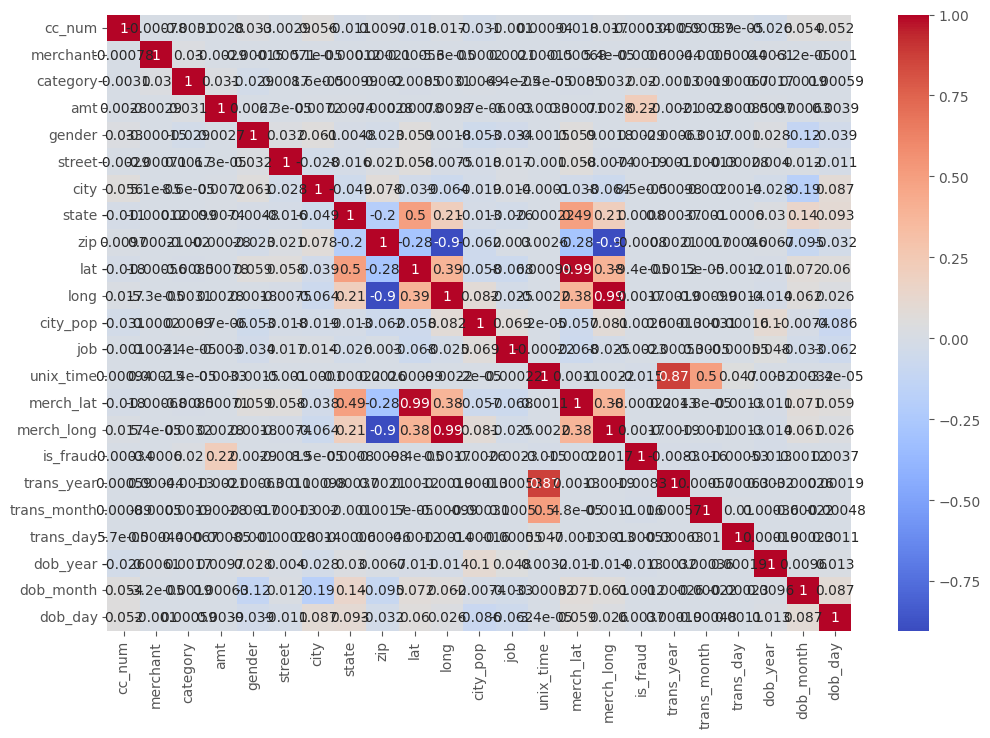

In [65]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm",annot=True)

**Sequential Model**

Input Layer: It takes an input with the shape of (X_train.shape[1],) which is the shape of your training data.

Dense Layer (64 units): It is a fully connected (dense) layer with 64 units and ReLU activation.

Dense Layer (32 units): Another fully connected layer with 32 units and ReLU activation.

Dense Layer (1 unit): The output layer with a single unit and sigmoid activation. This is a binary classification model, and the sigmoid activation function is often used for binary classification tasks.

After defining the model, you compile it using the Adam optimizer, binary cross-entropy loss (commonly used for binary classification problems), and accuracy as the metric for evaluation.

In [54]:

# Define the deep learning model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
19473/19473 [==============================] - 58s 3ms/step - loss: 0.0218 - accuracy: 0.9941 - val_loss: 0.0178 - val_accuracy: 0.9952
Epoch 2/5
19473/19473 [==============================] - 54s 3ms/step - loss: 0.0156 - accuracy: 0.9957 - val_loss: 0.0153 - val_accuracy: 0.9961
Epoch 3/5
19473/19473 [==============================] - 58s 3ms/step - loss: 0.0138 - accuracy: 0.9962 - val_loss: 0.0144 - val_accuracy: 0.9961
Epoch 4/5
19473/19473 [==============================] - 55s 3ms/step - loss: 0.0128 - accuracy: 0.9963 - val_loss: 0.0131 - val_accuracy: 0.9963
Epoch 5/5
19473/19473 [==============================] - 57s 3ms/step - loss: 0.0122 - accuracy: 0.9964 - val_loss: 0.0131 - val_accuracy: 0.9962


In [55]:

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

6086/6086 [==============================] - 11s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    193655
           1       0.77      0.48      0.59      1068

    accuracy                           1.00    194723
   macro avg       0.88      0.74      0.80    194723
weighted avg       1.00      1.00      1.00    194723

[[193497    158]
 [   552    516]]


**Implementing Convolutional Neural Network (CNN)**

This is a sequential model for a 1D Convolutional Neural Network (CNN) designed for some form of sequence data (possibly time-series data). It consists of the following layers:

Conv1D Layer (64 filters, kernel size 3): This layer performs a 1D convolution operation with 64 filters and a kernel size of 3. It uses ReLU activation.

MaxPooling1D Layer (pool size 2): After the convolution, there's a max-pooling layer with a pool size of 2.

Conv1D Layer (128 filters, kernel size 3): Another convolutional layer with 128 filters and kernel size 3, also using ReLU activation.

MaxPooling1D Layer (pool size 2): Another max-pooling layer with a pool size of 2.

Flatten Layer: This layer flattens the output from the previous layers into a 1D vector, preparing it for the fully connected layers.

Dense Layer (64 units): A fully connected layer with 64 units and ReLU activation.

Dropout Layer: A dropout layer with a dropout rate of 0.5, which helps prevent overfitting.

Dense Layer (1 unit): The output layer with a single unit and sigmoid activation, indicating binary classification.

The model is compiled using the Adam optimizer, binary cross-entropy loss, and accuracy as the metric, just like the first model.

In summary, the first model is a feedforward neural network, while the second model is a 1D convolutional neural network, typically used for sequence or time-series data. Both models are designed for binary classification tasks.

In [56]:
# Define the CNN-based deep learning model
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
19473/19473 [==============================] - 146s 7ms/step - loss: 0.0216 - accuracy: 0.9946 - val_loss: 0.0179 - val_accuracy: 0.9945
Epoch 2/10
19473/19473 [==============================] - 138s 7ms/step - loss: 0.0183 - accuracy: 0.9947 - val_loss: 0.0174 - val_accuracy: 0.9945
Epoch 3/10
19473/19473 [==============================] - 138s 7ms/step - loss: 0.0173 - accuracy: 0.9948 - val_loss: 0.0172 - val_accuracy: 0.9958
Epoch 4/10
19473/19473 [==============================] - 154s 8ms/step - loss: 0.0169 - accuracy: 0.9956 - val_loss: 0.0159 - val_accuracy: 0.9958
Epoch 5/10
19473/19473 [==============================] - 162s 8ms/step - loss: 0.0165 - accuracy: 0.9957 - val_loss: 0.0170 - val_accuracy: 0.9959
Epoch 6/10
19473/19473 [==============================] - 146s 7ms/step - loss: 0.0160 - accuracy: 0.9959 - val_loss: 0.0151 - val_accuracy: 0.9962
Epoch 7/10
19473/19473 [==============================] - 148s 8ms/step - loss: 0.0157 - accuracy: 0.9960 - val_

In [57]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

6086/6086 [==============================] - 16s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    193655
           1       0.66      0.60      0.63      1068

    accuracy                           1.00    194723
   macro avg       0.83      0.80      0.81    194723
weighted avg       1.00      1.00      1.00    194723

[[193330    325]
 [   429    639]]


**Implementing LSTM Model**

LSTM is a type of recurrent neural network (RNN) architecture, specifically designed to handle and capture long-range dependencies and temporal patterns in sequential data. LSTMs are often used in tasks such as time series analysis, natural language processing, and any task where the order of data points is significant.

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
19473/19473 [==============================] - 315s 16ms/step - loss: 0.0340 - accuracy: 0.9946 - val_loss: 0.0340 - val_accuracy: 0.9945
Epoch 2/5
19473/19473 [==============================] - 330s 17ms/step - loss: 0.0265 - accuracy: 0.9947 - val_loss: 0.0183 - val_accuracy: 0.9949
Epoch 3/5
19473/19473 [==============================] - 310s 16ms/step - loss: 0.0170 - accuracy: 0.9952 - val_loss: 

In [59]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

6086/6086 [==============================] - 34s 5ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    193655
           1       0.82      0.45      0.58      1068

    accuracy                           1.00    194723
   macro avg       0.91      0.72      0.79    194723
weighted avg       1.00      1.00      1.00    194723

[[193549    106]
 [   587    481]]


**Implementing GRU Model**

A GRU is a type of recurrent neural network (RNN) that is designed to capture and model sequential data. It is similar to the more complex LSTM (Long Short-Term Memory) but is computationally more efficient and can be easier to train.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

model = Sequential()
model.add(GRU(units=64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12929 (50.50 KB)
Trainable params: 12929 (50.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
19473/19473 [==============================] - 333s 17ms/step - loss: 0.0212 - accuracy: 0.9948 - val_loss: 0.0166 - val_accuracy: 0.9960
Epoch 2/5
19473/19473 [==============================] - 358s 18ms/step - loss: 0.0155 - accuracy: 0.9959 - val_loss: 0.0151 - val_accuracy: 0.9961
Epoch 3/5
19473/19473 [==============================] - 357s 18ms/step - loss: 0.0138 - accuracy: 0.9962 - val_loss: 

In [61]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

6086/6086 [==============================] - 49s 8ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    193655
           1       0.82      0.41      0.55      1068

    accuracy                           1.00    194723
   macro avg       0.91      0.71      0.77    194723
weighted avg       1.00      1.00      1.00    194723

[[193558     97]
 [   628    440]]


**Implementing Auto encoder model**

An autoencoder is a type of neural network used for dimensionality reduction, feature learning, and anomaly detection. It consists of an encoder network that maps the input data to a lower-dimensional representation and a decoder network that attempts to reconstruct the original input from this representation.

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the encoder part of the autoencoder
encoder = Sequential()
encoder.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
encoder.add(Dense(64, activation='relu'))

# Define the decoder part of the autoencoder
decoder = Sequential()
decoder.add(Dense(128, activation='relu', input_shape=(64,)))
decoder.add(Dense(X_train.shape[1], activation='sigmoid'))

# Combine the encoder and decoder to create the autoencoder
autoencoder = Sequential([encoder, decoder])

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.summary()
autoencoder.fit(X_train, X_train, epochs=5, batch_size=32, validation_split=0.2)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 64)                11200     
                                                                 
 sequential_5 (Sequential)   (None, 22)                11158     
                                                                 
Total params: 22358 (87.34 KB)
Trainable params: 22358 (87.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
19473/19473 [==============================] - 68s 3ms/step - loss: 0.5746 - val_loss: 0.5676
Epoch 2/5
19473/19473 [==============================] - 66s 3ms/step - loss: 0.5708 - val_loss: 0.5671
Epoch 3/5
19473/19473 [==============================] - 67s 3ms/step - loss: 0.5705 - val_loss: 0.5670
Epoch 4/5
19473/19473 [==============================] - 66s 3ms/step - loss: 0.5703 - val_loss: 0.567

In [67]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

6086/6086 [==============================] - 31s 5ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    193655
           1       0.82      0.41      0.55      1068

    accuracy                           1.00    194723
   macro avg       0.91      0.71      0.77    194723
weighted avg       1.00      1.00      1.00    194723

[[193558     97]
 [   628    440]]
